# pyforeca: toy example demo

In this simulation we construct a simple toy example to illustrate the goal of Forecastable Component Analysis (ForeCA). We start with three latent signals that have very different levels of forecastability: (1) a smooth sine wave with added noise, which is highly predictable due to its periodic structure, (2) an autoregressive AR(1) process with positive autocorrelation, which is moderately forecastable, and (3) pure white noise, which by definition has no forecastability. These sources are then linearly mixed through a fixed mixing matrix, so that the observed signals are each combinations of the three latent sources.

The task for ForeCA is to take only the observed mixtures and recover new components—linear combinations of the observed series—that are maximally forecastable. By running ForeCA on the mixtures, we expect to see it separate out components that resemble the original sine and AR(1) processes, ranking them by forecastability Ω, while assigning the lowest Ω to the white noise component. This demonstrates how ForeCA can identify and extract the most predictable structure hidden inside multivariate time series data.

This is simulated data and shows only the basics of functionality.  See the other demo notebook on real data with much more nuances and examples of visualizations and interesting findings that ForeCA can provide.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Not needed if in PATH
import os
import pathlib
parent_path = os.path.join(os.getcwd(), "..")

import sys
if parent_path not in sys.path:
    sys.path.insert(0, parent_path)

# Load relevant modules


In [3]:
from pyforeca.base import ForeCA
from pyforeca import optimizer
from pyforeca import viz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyforeca.datasets import simulations

# Simulating data and mixing

In [4]:
latent, mixing_mat, observed = simulations.gen_toy_data(1000)

(<Figure size 500x750 with 3 Axes>,
 array([<Axes: title={'center': 'sine_plus_noise'}>,
        <Axes: title={'center': 'ar1'}>,
        <Axes: title={'center': 'white_noise'}, xlabel='Time'>],
       dtype=object))

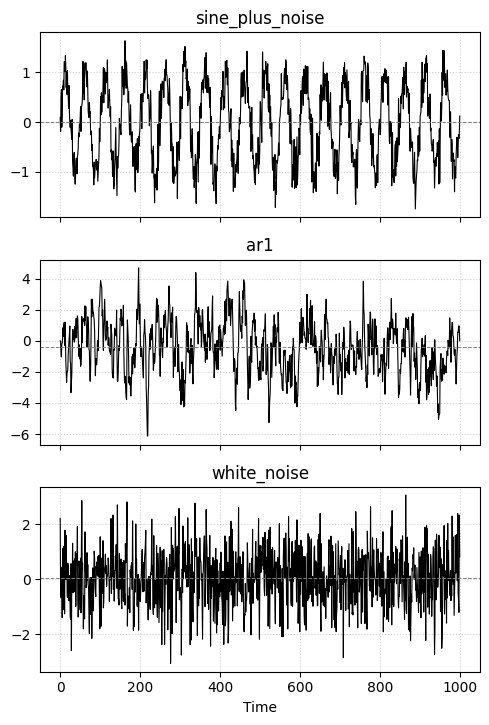

In [5]:
viz.plot_time_series(latent)

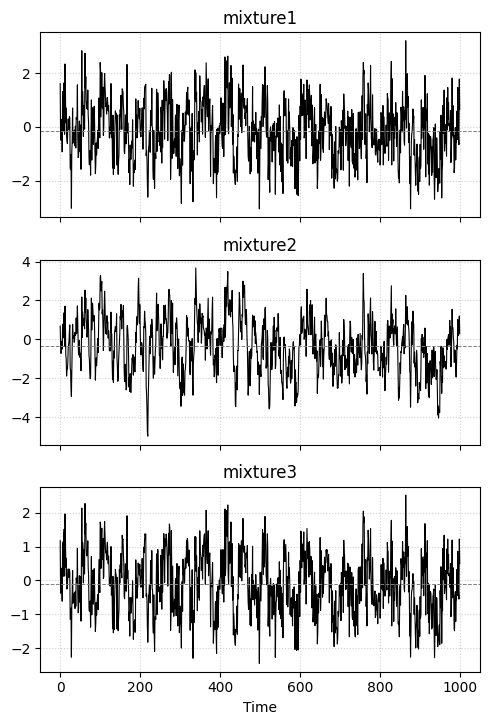

In [6]:
_ = viz.plot_time_series(observed)

In [7]:
# Run foreca on the observed data to find the underlying signals, based on forecastability.
mod_foreca = ForeCA(
    n_components=3,
    spectrum_method="welch",
    nperseg=128,
    init_method=optimizer.InitMethod.NORMAL,
    max_iter=200,
    tol=1e-7,
).fit(observed)

Finding ForeC 3 ...


Let's check if ForeCA found more forecastable signals than the observed data.

Forecastability Ω values:
ForeC1: 0.505
ForeC2: 0.193
ForeC3: 0.013


(<Figure size 1200x500 with 2 Axes>,
 array([<Axes: title={'center': 'Forecastability (ForeCs)'}, ylabel='Ω (%)'>,
        <Axes: title={'center': 'Forecastability (X)'}>], dtype=object))

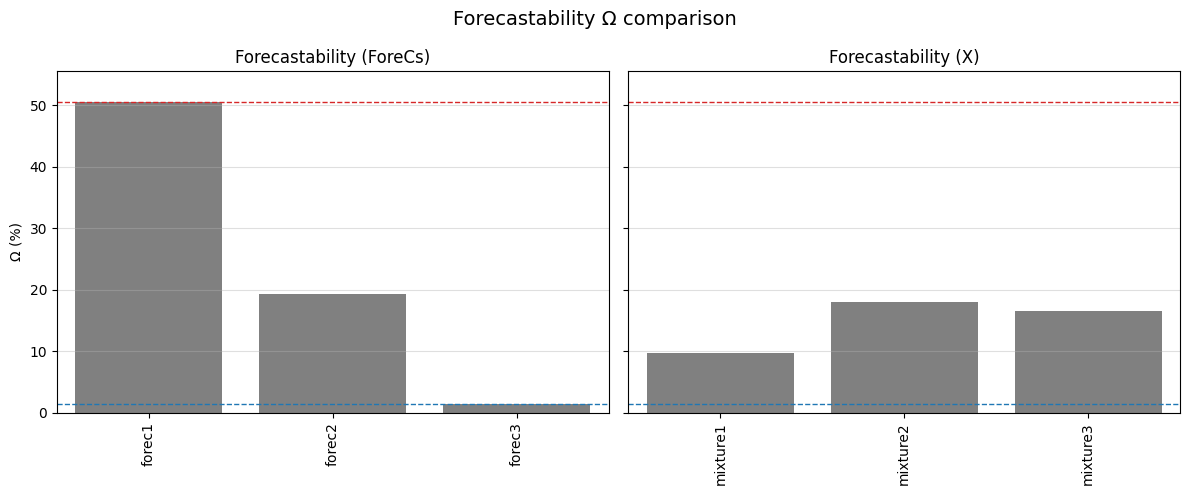

In [8]:
print("Forecastability Ω values:")
for i, omega in enumerate(mod_foreca.omegas_):
    print(f"ForeC{i+1}: {omega:.3f}")
    
viz.plot_foreca(mod_foreca)

(<Figure size 500x750 with 3 Axes>,
 array([<Axes: title={'center': 'forec1'}>,
        <Axes: title={'center': 'forec2'}>,
        <Axes: title={'center': 'forec3'}, xlabel='Time'>], dtype=object))

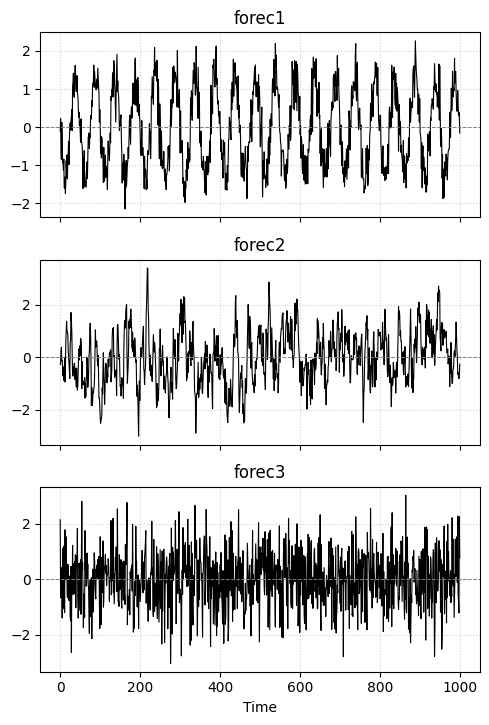

In [9]:
# forecastable components (aka ForeCs)
Y = mod_foreca.transform(observed)
viz.plot_time_series(Y)

Check if the recovered sources (ForeCs) are the same as the original signals, using simple correlation. Up to multiplication with +/-1 they should have very high correlation with original signals.

Correlation between original sources (rows) and recovered ForeCs (cols):


<Axes: >

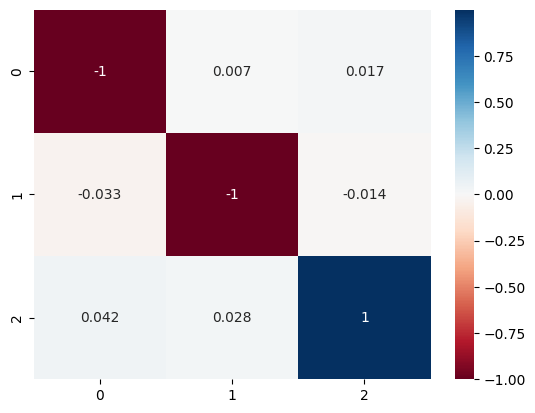

In [10]:
from scipy.stats import pearsonr
import seaborn as sns
# Compare recovered ForeCs (Y) to original sources (S)
corr_matrix = np.zeros((latent.shape[1], Y.shape[1]))
for i in range(latent.shape[1]):
    for j in range(Y.shape[1]):
        corr_matrix[i, j] = pearsonr(latent.iloc[:, i], Y.iloc[:, j])[0]

print("Correlation between original sources (rows) and recovered ForeCs (cols):")
sns.heatmap(np.round(corr_matrix, 3), annot=True, cmap="RdBu", center=0.)


For realistic examples and demonstrations see the `pyforeca-demo.ipynb` notebook.